<a href="https://colab.research.google.com/github/Ashsam2310/Ashsam2310/blob/main/MNIST_using_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [3]:
(X_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

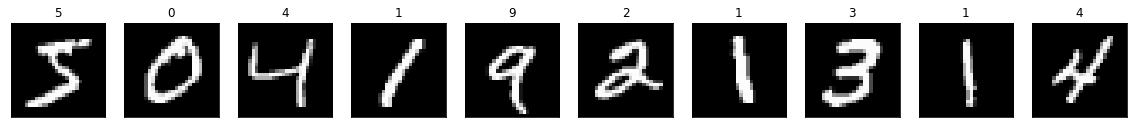

In [4]:
fig,axes=plt.subplots(ncols=10,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


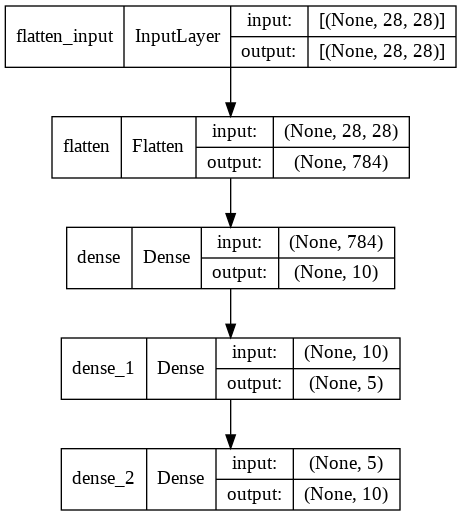

In [9]:
utils.plot_model(model,show_shapes=True)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [11]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8310 - acc: 0.4282 - val_loss: 1.4481 - val_acc: 0.5582
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2816 - acc: 0.6169 - val_loss: 1.1556 - val_acc: 0.6260
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0525 - acc: 0.6740 - val_loss: 0.9784 - val_acc: 0.7296
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9344 - acc: 0.7272 - val_loss: 0.8796 - val_acc: 0.7234
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8604 - acc: 0.7426 - val_loss: 0.7912 - val_acc: 0.7658
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7953 - acc: 0.7697 - val_loss: 0.7933 - val_acc: 0.7739
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7634 - acc: 0.7891 - val_loss: 0.6747 - val_acc: 0.8214
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

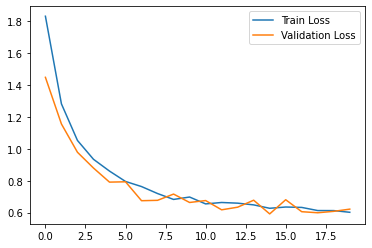

In [12]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

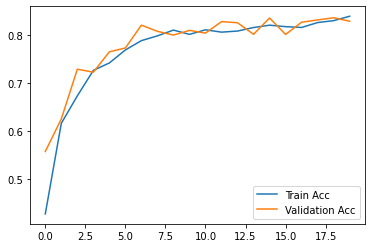

In [13]:
plt.plot(history.history['acc'],label='Train Acc')
plt.plot(history.history['val_acc'],label='Validation Acc')
plt.legend()

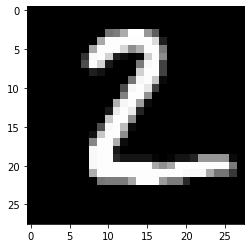

In [21]:
plt.imshow(x_test[1],cmap='gray')

In [20]:
x=np.reshape(x_test[1],(1,28,28,))
np.argmax(model.predict(x))

2